# Observable Trends:

1.The max temperature of cities is generally higher towards the equator (0 latitude) and decreases as the cities move away from equator on either sides. However, the temperature is slightly higher between 20 to 40 latitude which is not exactly expected.

2.Humidity for cities is generally higher closer to equator.

3.No significant connection can be established for Wind Speed and Cloudiness of cities and their distance from the equator.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

#Creating dataframe for the list of cities gathered
city_temp_df = pd.DataFrame(cities , columns={"City"})

#Creating columns for weather attributes
#Setting the Humidity column to -1 to use it as a filter later to remove rows for which weather data was not found

city_temp_df["Temperature"] = 0
city_temp_df["Humidity"] = -1
city_temp_df["Cloudiness"] = 0
city_temp_df["WindSpeed"] = 0
city_temp_df["Latitude"] = 0


591


## Perform API Calls

In [3]:
#Uncomment below block of code to run the API for one sample city and get a feel of the json response

# # OpenWeatherMap API Key
# api_key = api_keys.api_key
# print(api_key)

# # Starting URL for Weather Map API Call
# base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# response = requests.get(base_url+"&q=sao filipe").json()
# print(json.dumps(response, indent = 4))

# print(f'Temp is : {response["main"]["temp_max"]}')
# print(f'Humidity is : {response["main"]["humidity"]}')
# print(f'Cloudiness is : {response["clouds"]["all"]}')
# print(f'Wind Speed is : {response["wind"]["speed"]}')
# print(f'Lat is : {response["coord"]["lat"]}')

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
print(api_key)

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#Count to keep track of cities for which weather info is retrieved from the API
count = 0

print("Beginning Data Retrieval")
print("---------------------------------------")

for index, row in city_temp_df.iterrows():
    
    count += 1
    
    #Exit the FOR loop if data has been successfully collected for 500 cities
    if count > 500:
        break
    
    #Fetching the city
    city = row['City']
    print(f'Processing record {index+1} | {city}')
    
    #Appending city to the URL
    url = base_url+"&q="+city
    
    print(url)
    
    #Calling the API and storing the JSON response
    response = requests.get(url).json()
    
    try:
        #fetch the required parameters
        city_temp_df.loc[index, "Temperature"] = response['main']['temp_max']
        city_temp_df.loc[index, "Humidity"] = response['main']['humidity']
        city_temp_df.loc[index, "Cloudiness"] = response['clouds']['all']
        city_temp_df.loc[index, "WindSpeed"] = response['wind']['speed']
        city_temp_df.loc[index, "Latitude"] = response["coord"]["lat"]
        
    except:
        #If exception occurs in try above, print a message and reduce the count by -1
        print(f'No details found for {city}')
        count -= 1
        



f23da94c12d086cb80f54ef39f71f232
Beginning Data Retrieval
---------------------------------------
Processing record 1 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=belushya guba
No details found for belushya guba
Processing record 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=port alfred
Processing record 3 | arcata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=arcata
Processing record 4 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=punta arenas
Processing record 5 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=vaini
Processing record 6 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=tao

Processing record 55 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=upernavik
Processing record 56 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=vestmannaeyjar
Processing record 57 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=ponta do sol
Processing record 58 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=sentyabrskiy
No details found for sentyabrskiy
Processing record 59 | mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=mayumba
Processing record 60 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=saskylakh
Processing record 61 | ponta delgada
http://api.openweathermap.org/data/

Processing record 112 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=barentsburg
No details found for barentsburg
Processing record 113 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=atuona
Processing record 114 | khandbari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=khandbari
Processing record 115 | rivera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=rivera
Processing record 116 | saryshagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=saryshagan
No details found for saryshagan
Processing record 117 | eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=eyl
Processing record 118 | acajutla
http://api.openweathermap.org/data/2.5

Processing record 167 | doume
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=doume
No details found for doume
Processing record 168 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=hualmay
Processing record 169 | rungata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=rungata
No details found for rungata
Processing record 170 | banda aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=banda aceh
Processing record 171 | abadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=abadan
Processing record 172 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=ribeira grande
Processing record 173 | san patricio
http://api.openweathermap.org/data/

Processing record 222 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=sola
Processing record 223 | saint-doulchard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=saint-doulchard
Processing record 224 | aracruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=aracruz
Processing record 225 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=geraldton
Processing record 226 | timizart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=timizart
Processing record 227 | zeya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=zeya
Processing record 228 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef3

Processing record 278 | savannah bight
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=savannah bight
Processing record 279 | hunza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=hunza
No details found for hunza
Processing record 280 | santa rosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=santa rosa
Processing record 281 | varnamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=varnamo
Processing record 282 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=alice springs
Processing record 283 | alekseyevsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=alekseyevsk
Processing record 284 | nam tha
http://api.openweathermap.org/data/2.5/weather?

Processing record 334 | mattru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=mattru
Processing record 335 | millinocket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=millinocket
Processing record 336 | ifanadiana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=ifanadiana
Processing record 337 | sungaipenuh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=sungaipenuh
Processing record 338 | atasu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=atasu
Processing record 339 | adre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=adre
Processing record 340 | ajaccio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232

Processing record 391 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=saldanha
Processing record 392 | yanam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=yanam
Processing record 393 | totness
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=totness
Processing record 394 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=grand gaube
Processing record 395 | aleksandrow kujawski
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=aleksandrow kujawski
Processing record 396 | savalou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=savalou
Processing record 397 | goya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d08

Processing record 446 | khon buri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=khon buri
Processing record 447 | zhanatas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=zhanatas
No details found for zhanatas
Processing record 448 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=lagoa
Processing record 449 | carberry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=carberry
Processing record 450 | kewanee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=kewanee
Processing record 451 | merauke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=merauke
Processing record 452 | rio branco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da

Processing record 502 | bayir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=bayir
Processing record 503 | aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=aswan
Processing record 504 | port pirie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=port pirie
Processing record 505 | kandi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=kandi
Processing record 506 | yafran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=yafran
Processing record 507 | nurota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=nurota
Processing record 508 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f23da94c12d086cb80f54ef39f71f232&q=nouadhibou
Pro

In [5]:
#Filter the DataFrame to remove rows for which no temperature data was retrieved from the API
city_temp_df = city_temp_df[city_temp_df.Humidity != -1]

#Saving the data into a csv file
city_temp_df.to_csv(output_data_file, sep=',', index=False)

#Display top 5 records
city_temp_df.head()

,City,Temperature,Humidity,Cloudiness,WindSpeed,Latitude
1,port alfred,58.00,100,88,12.82,-33.59
2,arcata,57.20,87,90,8.05,40.87
3,punta arenas,33.80,69,20,14.99,-53.16
4,vaini,70.24,100,100,7.67,15.34
6,serenje,56.02,74,0,9.69,-13.23


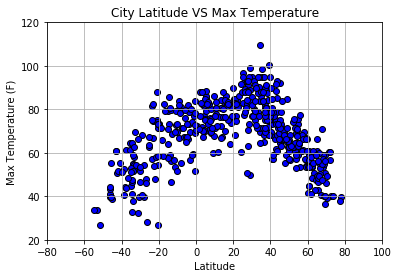

In [6]:
#Plotting a scatter plot for Max temperatue of cities against the latitude and save the image

plt.scatter(city_temp_df["Latitude"],city_temp_df['Temperature'],marker = "o",edgecolors= 'black' ,facecolors = 'blue')
plt.title("City Latitude VS Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80,100)
plt.ylim(20,120)
plt.grid()
plt.savefig("output_data/LatTemp.png")
plt.show()


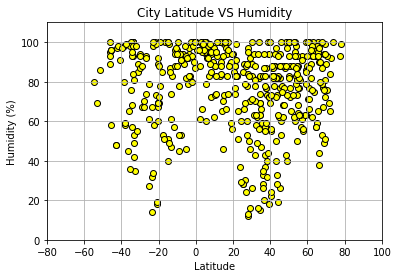

In [7]:
#Plotting a scatter plot for Humidity of cities against the latitude and save the image

plt.scatter(city_temp_df["Latitude"],city_temp_df['Humidity'],marker = "o",edgecolors= 'black' ,facecolors = 'yellow')
plt.title("City Latitude VS Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80,100)
plt.ylim(0,110)
plt.grid()
plt.savefig("output_data/LatHumidity.png")
plt.show()

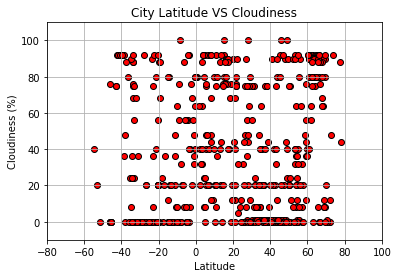

In [8]:
#Plotting a scatter plot for Cloudiness of cities against the latitude and save the image

plt.scatter(city_temp_df["Latitude"],city_temp_df['Cloudiness'],marker = "o",edgecolors= 'black' ,facecolors = 'red')
plt.title("City Latitude VS Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,100)
plt.ylim(-10,110)
plt.grid()
plt.savefig("output_data/LatCloudiness.png")
plt.show()

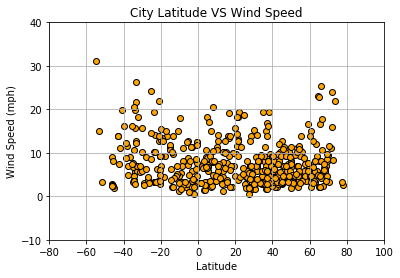

In [9]:
#Plotting a scatter plot for WindSpeed of cities against the latitude and save the image

plt.scatter(city_temp_df["Latitude"],city_temp_df['WindSpeed'],marker = "o",edgecolors= 'black' ,facecolors = 'orange')
plt.title("City Latitude VS Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.ylim(-10,40)
plt.grid()
plt.savefig("output_data/Windspeed.png")
plt.show()